# **Tame Your Python**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import NMF
n_components = 80
decomposer = NMF(n_components=n_components).fit(X_train)

X_train_d = decomposer.transform(X_train)
X_test_d = decomposer.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_d, y_train)

Iteration 1, loss = 1.73781870
Validation score: 0.514563
Iteration 2, loss = 1.23258887
Validation score: 0.456311
Iteration 3, loss = 0.97588081
Validation score: 0.621359
Iteration 4, loss = 0.80204172
Validation score: 0.679612
Iteration 5, loss = 0.67780647
Validation score: 0.728155
Iteration 6, loss = 0.59484667
Validation score: 0.786408
Iteration 7, loss = 0.52195806
Validation score: 0.796117
Iteration 8, loss = 0.46004815
Validation score: 0.786408
Iteration 9, loss = 0.41735629
Validation score: 0.805825
Iteration 10, loss = 0.36687281
Validation score: 0.825243
Iteration 11, loss = 0.33829688
Validation score: 0.815534
Iteration 12, loss = 0.30805483
Validation score: 0.844660
Iteration 13, loss = 0.27854814
Validation score: 0.825243
Iteration 14, loss = 0.25653747
Validation score: 0.834951
Iteration 15, loss = 0.23914598
Validation score: 0.834951
Iteration 16, loss = 0.21711703
Validation score: 0.873786
Iteration 17, loss = 0.19839034
Validation score: 0.854369
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_d)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       1.00      0.93      0.96        27
  Donald Rumsfeld       0.80      0.67      0.73         6
    George W Bush       0.88      0.96      0.92        54
Gerhard Schroeder       0.83      0.59      0.69        17
       Tony Blair       0.62      0.80      0.70        10

         accuracy                           0.87       114
        macro avg       0.83      0.79      0.80       114
     weighted avg       0.87      0.87      0.87       114



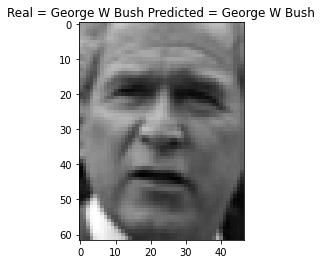

In [12]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()

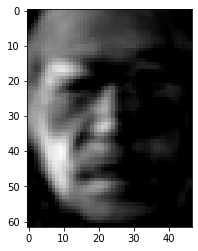

In [13]:
idx = 1
plt.figure()
plt.imshow(decomposer.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()

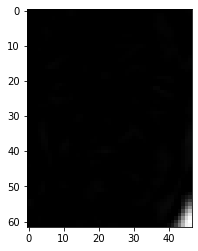

In [14]:
idx = 79
plt.figure()
plt.imshow(decomposer.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()